In [1]:
import numpy as np
from glob import glob

import des_utils
import des_io

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

In [2]:
sim_files = glob("../ZD_KNDES_TEST/*DAT")
thelist,theheaders = des_utils.get_all_obs(sim_files)

In [3]:
shallow_list,deep_list = des_utils.get_depth_lists(thelist)

In [4]:
zbandinfo = des_utils.get_band_info(shallow_list,'z')
ibandinfo = des_utils.get_band_info(shallow_list,'i')

In [5]:
ztrig = des_utils.trigger_selector(zbandinfo)
itrig = des_utils.trigger_selector(ibandinfo)

In [6]:
zsellist,isellist = des_utils.common_trignite_selector(zbandinfo,ibandinfo)

In [7]:
zSNR_sel = des_utils.get_SNR_selector(zbandinfo)
iSNR_sel = des_utils.get_SNR_selector(ibandinfo)

In [8]:
trig_flags_list,anytrigs = des_utils.get_trig_flags_list(ztrig,itrig,zsellist,isellist,zSNR_sel,iSNR_sel)
print np.sum(anytrigs)

679


In [9]:
MJDtriglist = des_utils.get_trig_MJD_list(zbandinfo,trig_flags_list,zsellist)
detection_flags_list = des_utils.get_detection_flags_list(MJDtriglist,zbandinfo,ibandinfo)

In [10]:
sim_triggers, sim_colors, sim_ifluxes,simdet,SNIDset,deltaT = des_utils.extract_colors(sim_files)

In [11]:
SNIDset2 = set()
for i in range(0,len(detection_flags_list)):
    if detection_flags_list[i] and anytrigs[i]:
        SNIDset2.add(theheaders[i]['SNID'])
        if not (theheaders[i]['SNID'] in SNIDset):
            print i
            print theheaders[i]['SNID']
            print "zbandinfo: ", zbandinfo[i]
            print "ibandinfo: ", ibandinfo[i]
            print "MJDtriglist: ", MJDtriglist[i]
            
print list(set(SNIDset)-set(SNIDset2)), len(list(set(SNIDset)-set(SNIDset2)))
print list(set(SNIDset2)-set(SNIDset)), len(list(set(SNIDset2)-set(SNIDset)))

[] 0
[] 0


In [12]:
print theheaders[900]['SNID']

9012


In [13]:
print detection_flags_list[900]

True


In [14]:
print zSNR_sel[900]

[False False False False False False False False False False False False
 False False False]


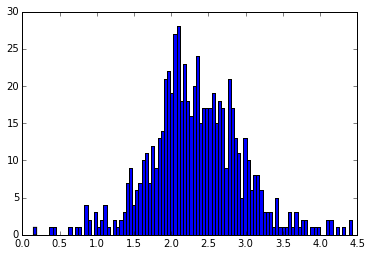

In [15]:
colors = []
for i in range(0,len(trig_flags_list)):
    if anytrigs[i]:
        imag = -2.5*np.log(ibandinfo[i][2][itrig[i] & isellist[i]][0])
        zmag = -2.5*np.log(zbandinfo[i][2][ztrig[i] & zsellist[i]][0])
        colors.append(imag-zmag)
plt.hist(colors,bins=100);